In [105]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import loguniform

warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [106]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

In [107]:
hwdf = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/HeightsWeights.csv', index_col=0)
hwdf.head()


,Height(Inches),Weight(Pounds),Weight(Kilograms)
Index,,,
1,65.78331,112.9925,51.253062
2,71.51521,136.4873,61.910233
3,69.39874,153.0269,69.412546
4,68.21660,142.3354,64.562914
5,67.78781,144.2971,65.452735


In [108]:
hwdf.shape

(25000, 3)

In [109]:
scaler = StandardScaler()

In [110]:
hwdf[:] = scaler.fit_transform(hwdf)
hwdf.columns = [f'{c} (scaled)'for c in hwdf.columns]
hwdf.head()

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Index,,,
1,-1.162051,-1.208072,-1.208072
2,1.852136,0.806805,0.806805
3,0.739165,2.225214,2.225214
4,0.117523,1.308328,1.308328
5,-0.107961,1.476561,1.476561


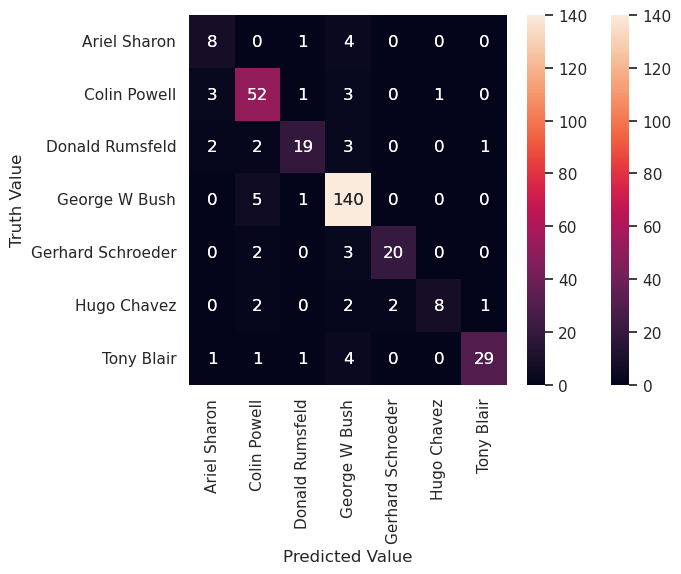

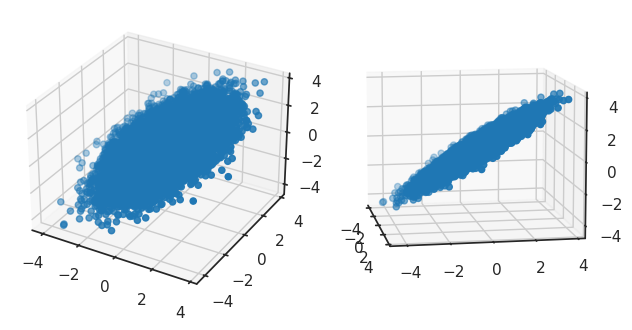

In [111]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
ax1.scatter(xs, ys, zs)

ax2 = fig.add_subplot(122, projection='3d')
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
ax2.view_init(elev=10, azim=-10)
ax2.scatter(xs, ys, zs)

plt.tight_layout()
plt.show()

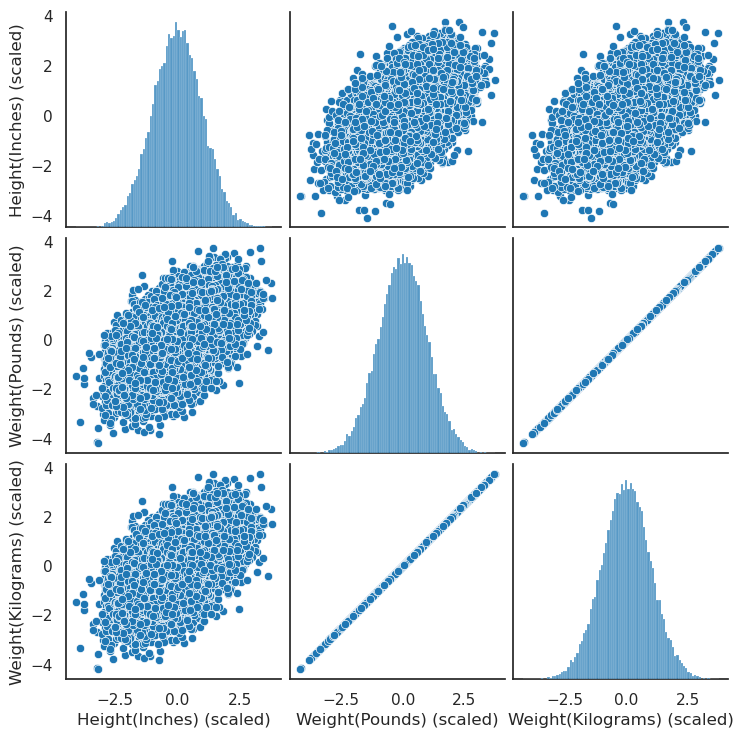

In [112]:
sns.pairplot(hwdf)
plt.show()

In [113]:
hwdf.corr().style.background_gradient(cmap='coolwarm')

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Height(Inches) (scaled),1.000000,0.502859,0.502859
Weight(Pounds) (scaled),0.502859,1.000000,1.000000
Weight(Kilograms) (scaled),0.502859,1.000000,1.000000


In [114]:
pca = PCA()
pca.fit(hwdf)

PCA()

In [115]:
Xhat = pca.transform(hwdf)
Xhat.shape

(25000, 3)

In [116]:
hwdf_PCA= pd.DataFrame(columns=[f'Projection on component {i+1}' for i in range(len(hwdf.columns))], data=Xhat)
hwdf_PCA

,Projection on component 1,Projection on component 2,Projection on component 3
0,-2.051774,-0.243847,1.171536e-15
1,1.866218,1.117813,1.723353e-16
2,3.133436,-0.794420,6.131301e-17
3,1.696186,-0.748473,-4.937985e-16
4,1.803402,-1.058234,-3.827762e-16
...,...,...,...
24995,-0.608133,1.210008,-6.048208e-16
24996,-1.576087,-1.222719,2.833576e-16
24997,-1.747143,-1.044829,6.164245e-16
24998,0.446033,-0.506547,1.723353e-16


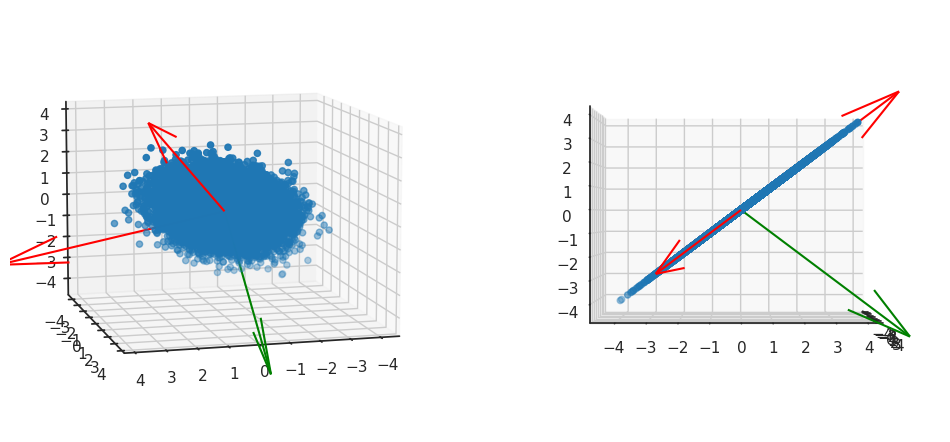

red component accounts for 78.98% of explained variance
red component accounts for 21.02% of explained variance
green component accounts for 0.00% of explained variance


In [117]:
colors = ['red', 'red', 'green']

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121, projection='3d')
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
ax1.view_init(elev=10, azim=75)
ax1.scatter(xs, ys, zs)

for component, color in zip(pca.components_, colors):
    ax1.quiver(*[0, 0, 0], *(8 * component), color=color)

    
ax2 = fig.add_subplot(122, projection='3d')
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
ax2.view_init(elev=0, azim=0)
ax2.scatter(xs, ys, zs)

for component, color in zip(pca.components_, colors):
    ax2.quiver(*[0, 0, 0], *(8 * component), color=color)

plt.show()

for color, ev in zip(colors, pca.explained_variance_ratio_):
    print(f'{color} component accounts for {ev * 100:.2f}% of explained variance')

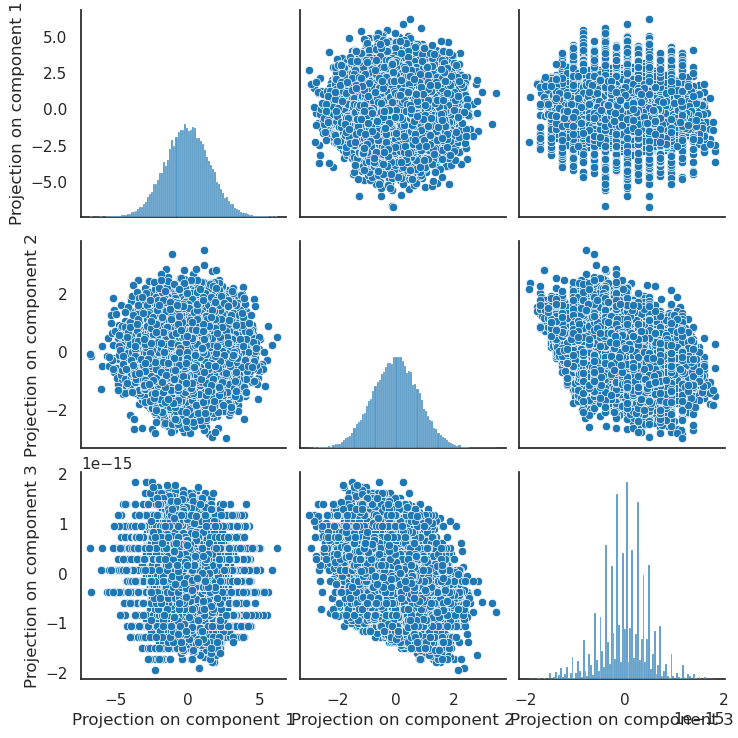

In [118]:
sns.pairplot(hwdf_PCA)
plt.show()

In [119]:
hwdf_PCA.corr().style.background_gradient(cmap='coolwarm')


,Projection on component 1,Projection on component 2,Projection on component 3
Projection on component 1,1.000000,0.000000,-0.059300
Projection on component 2,0.000000,1.000000,-0.365041
Projection on component 3,-0.059300,-0.365041,1.000000


In [120]:
hwdf_PCA.drop('Projection on component 3', axis=1, inplace=True)
hwdf_PCA.head()

,Projection on component 1,Projection on component 2
0,-2.051774,-0.243847
1,1.866218,1.117813
2,3.133436,-0.794420
3,1.696186,-0.748473
4,1.803402,-1.058234


In [121]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(hwdf),
                 index=hwdf.index,
                 columns=hwdf.columns)

pca = PCA()
X_PCA = pd.DataFrame(pca.fit_transform(X),
                     index=X.index,
                     columns=[f'Component {i}' for i in range(pca.n_components_)])

X_PCA.head()

,Component 0,Component 1,Component 2
Index,,,
1,-2.051774,-0.243847,1.006988e-15
2,1.866218,1.117813,6.739215e-16
3,3.133436,-0.794420,2.298323e-16
4,1.696186,-0.748473,-4.363016e-16
5,1.803402,-1.058234,-2.142569e-16


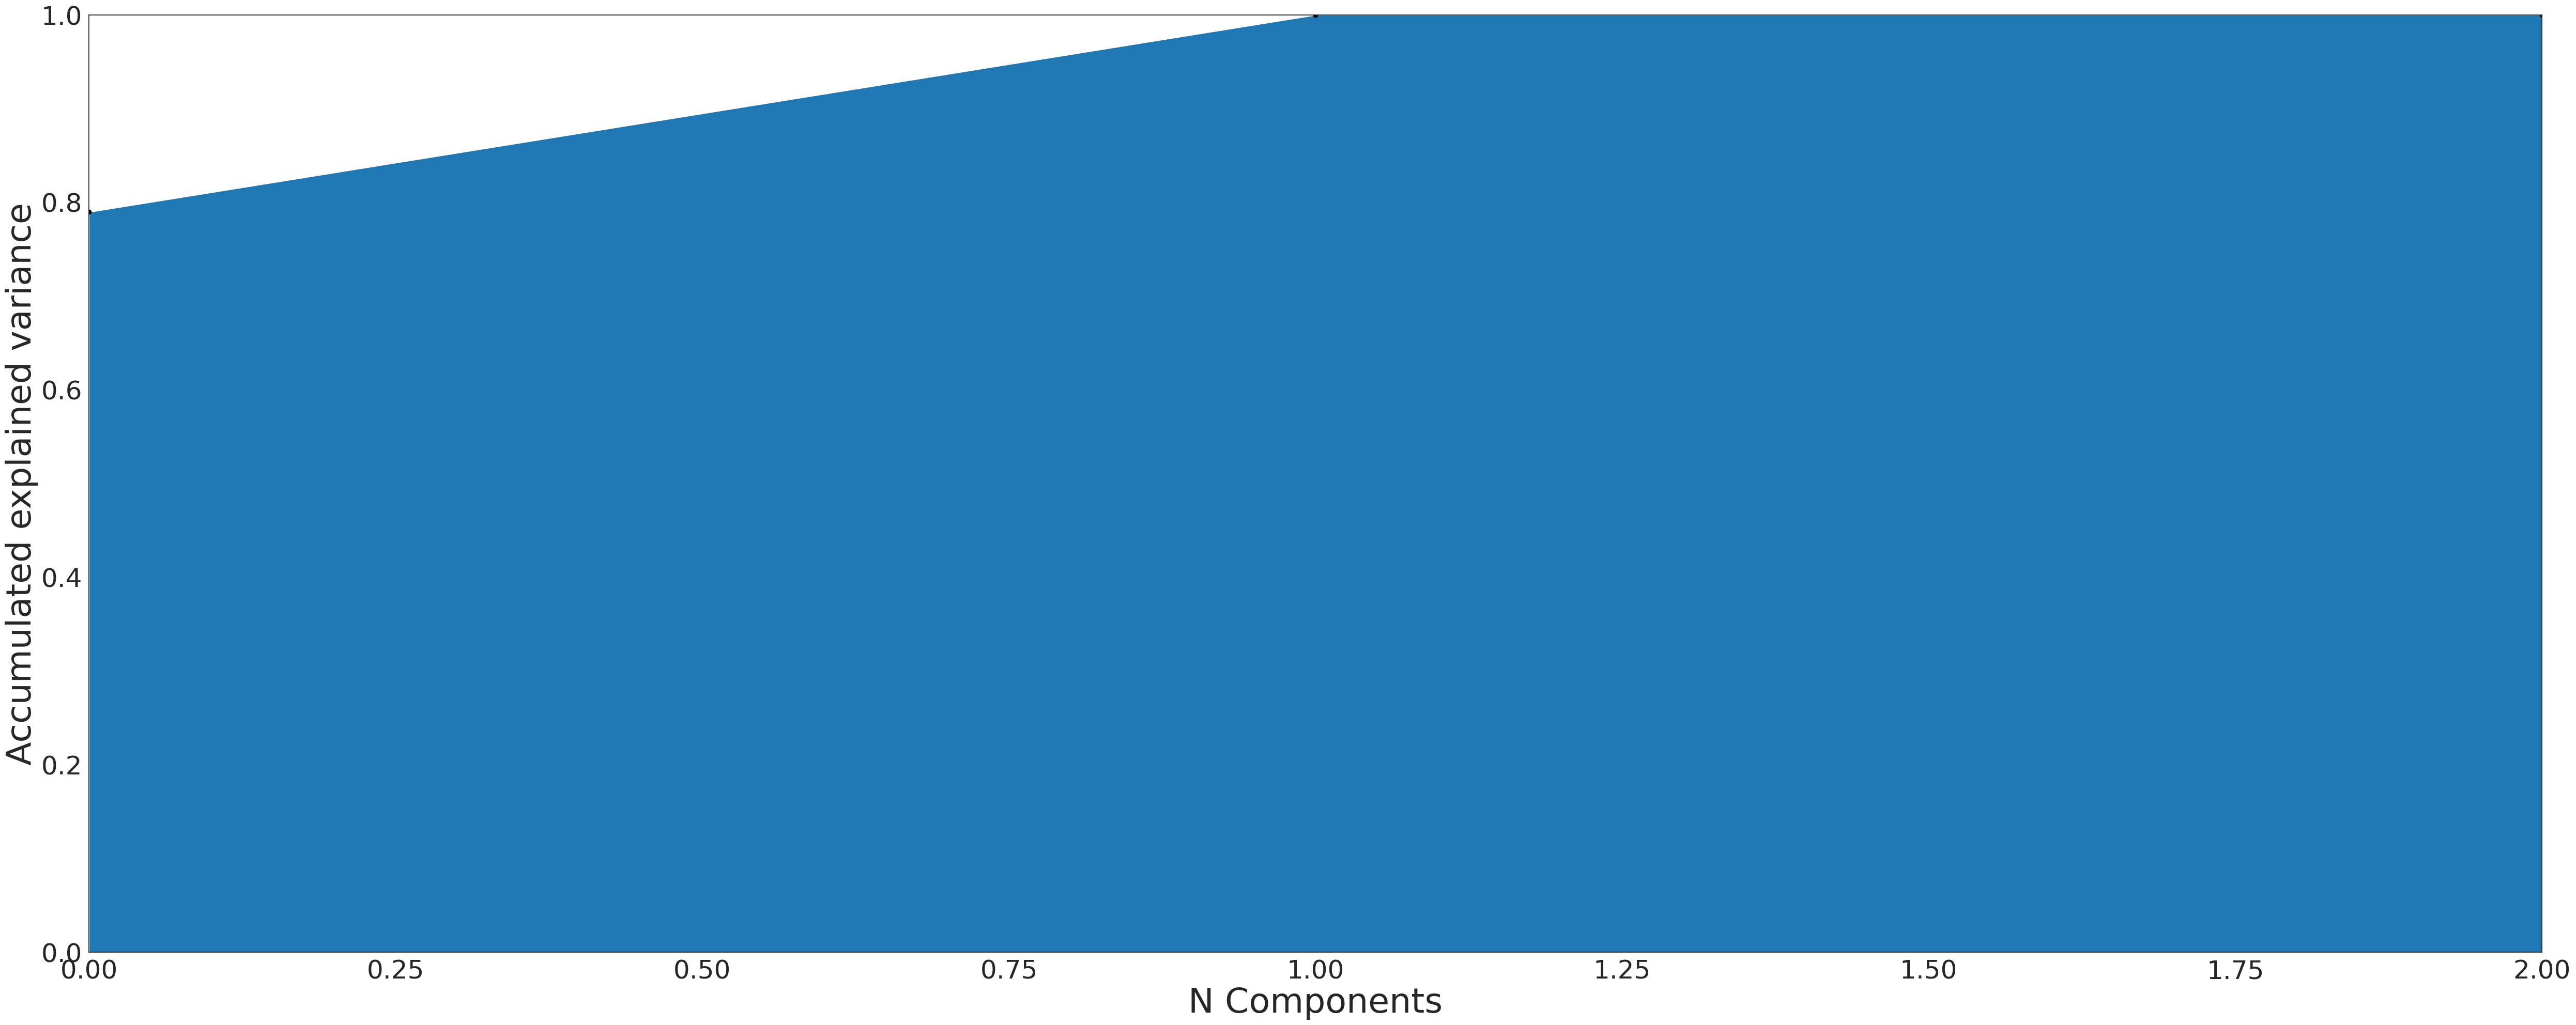

In [122]:
plot_explained_variance(pca)


In [123]:
threshold = 0.99
num = next(i for i, x in enumerate(accumulate(pca.explained_variance_ratio_),1) 
           if x >= threshold)
print(f'we can keep the first {num} components and discard the other {pca.n_components_-num}')
print(f'keeping >={100*threshold}% of the explained variance!')

we can keep the first 2 components and discard the other 1
keeping >=99.0% of the explained variance!


In [124]:
X_PCA.drop([f'Component {i}' for i in range(num, pca.n_components_)], axis=1, inplace=True)
X_PCA.head()

,Component 0,Component 1
Index,,
1,-2.051774,-0.243847
2,1.866218,1.117813
3,3.133436,-0.794420
4,1.696186,-0.748473
5,1.803402,-1.058234


In [125]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [126]:
N,h,w = lfw_people.images.shape
target_names = lfw_people.target_names

In [127]:
y = lfw_people.target
X = lfw_people.data
n_features = X.shape[1]

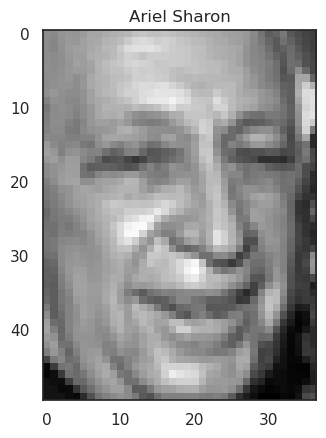

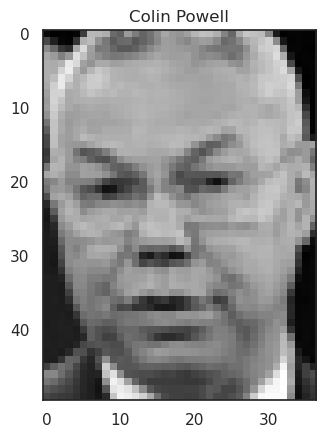

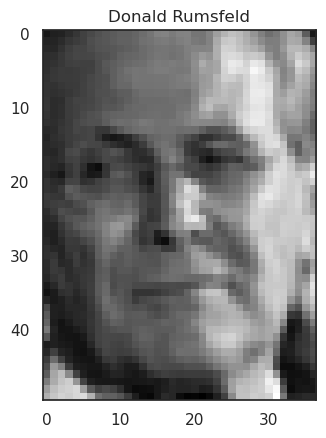

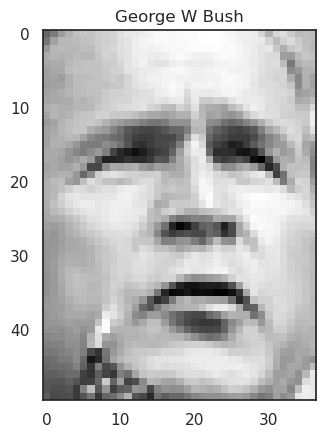

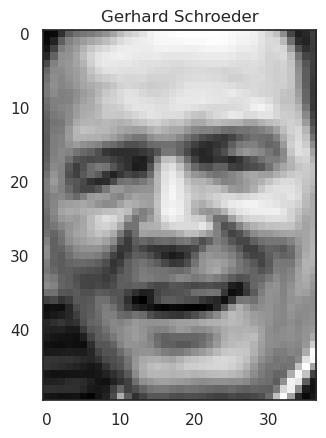

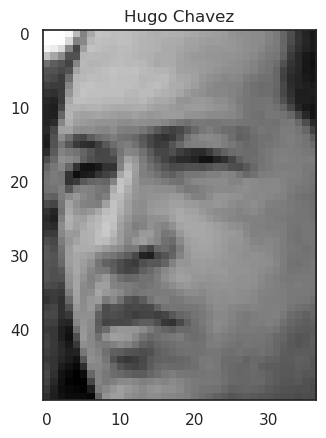

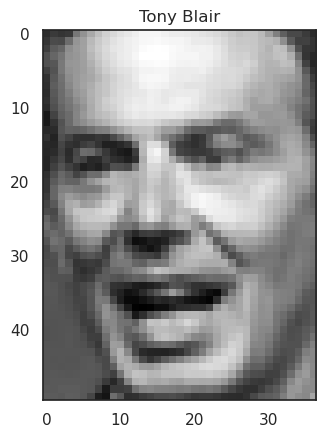

In [128]:
for person in np.unique(lfw_people.target):
    idx = np.argmax(lfw_people.target == person)
    plt.imshow(lfw_people.images[idx], cmap='gray')
    plt.title(lfw_people.target_names[person])
    plt.show()

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [130]:
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1)
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train, y_train)

In [131]:
y_pred = clf.predict(X_test)


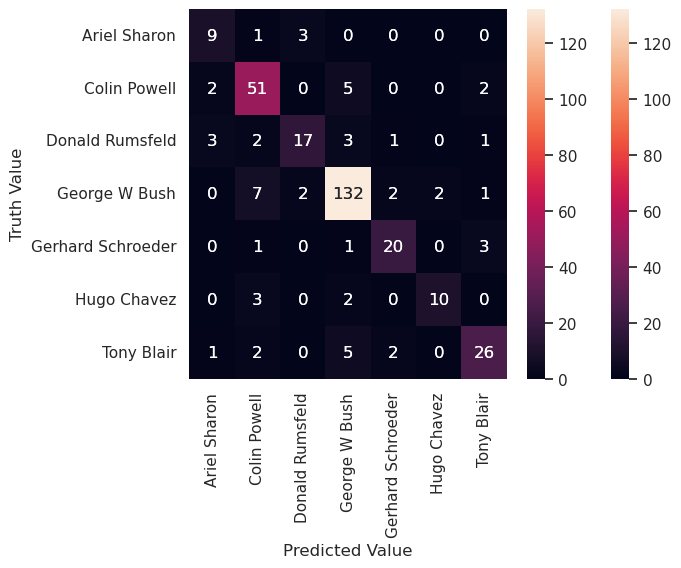

In [133]:
hmap = sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    xticklabels=lfw_people.target_names,
    yticklabels=lfw_people.target_names,
    fmt='g'
)
hmap.set_xlabel('Predicted Value')
hmap.set_ylabel('Truth Value')
plt.show()

In [134]:
pca = PCA(svd_solver='full', whiten=True).fit(X_train)

In [135]:
person_index =1

In [136]:
Xhat=pca.transform(X[person_index,:].reshape(1, -1))


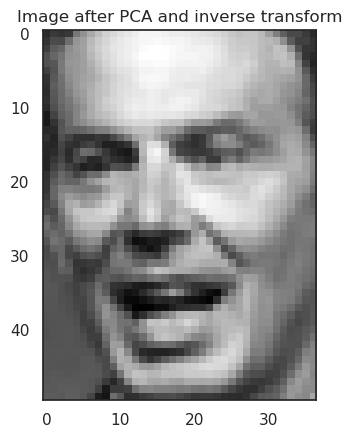

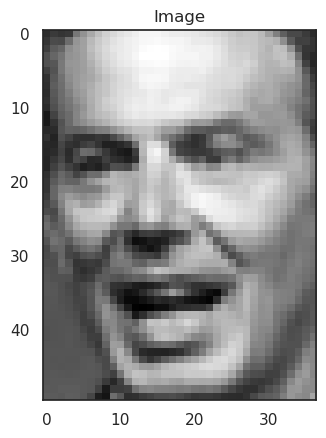

In [138]:
plt.imshow(pca.inverse_transform(Xhat).reshape(h, w), cmap='gray')
plt.title("Image after PCA and inverse transform"  ) 
plt.show()
plt.imshow(lfw_people.images[person_index],cmap='gray')
plt.title("Image")
plt.show()

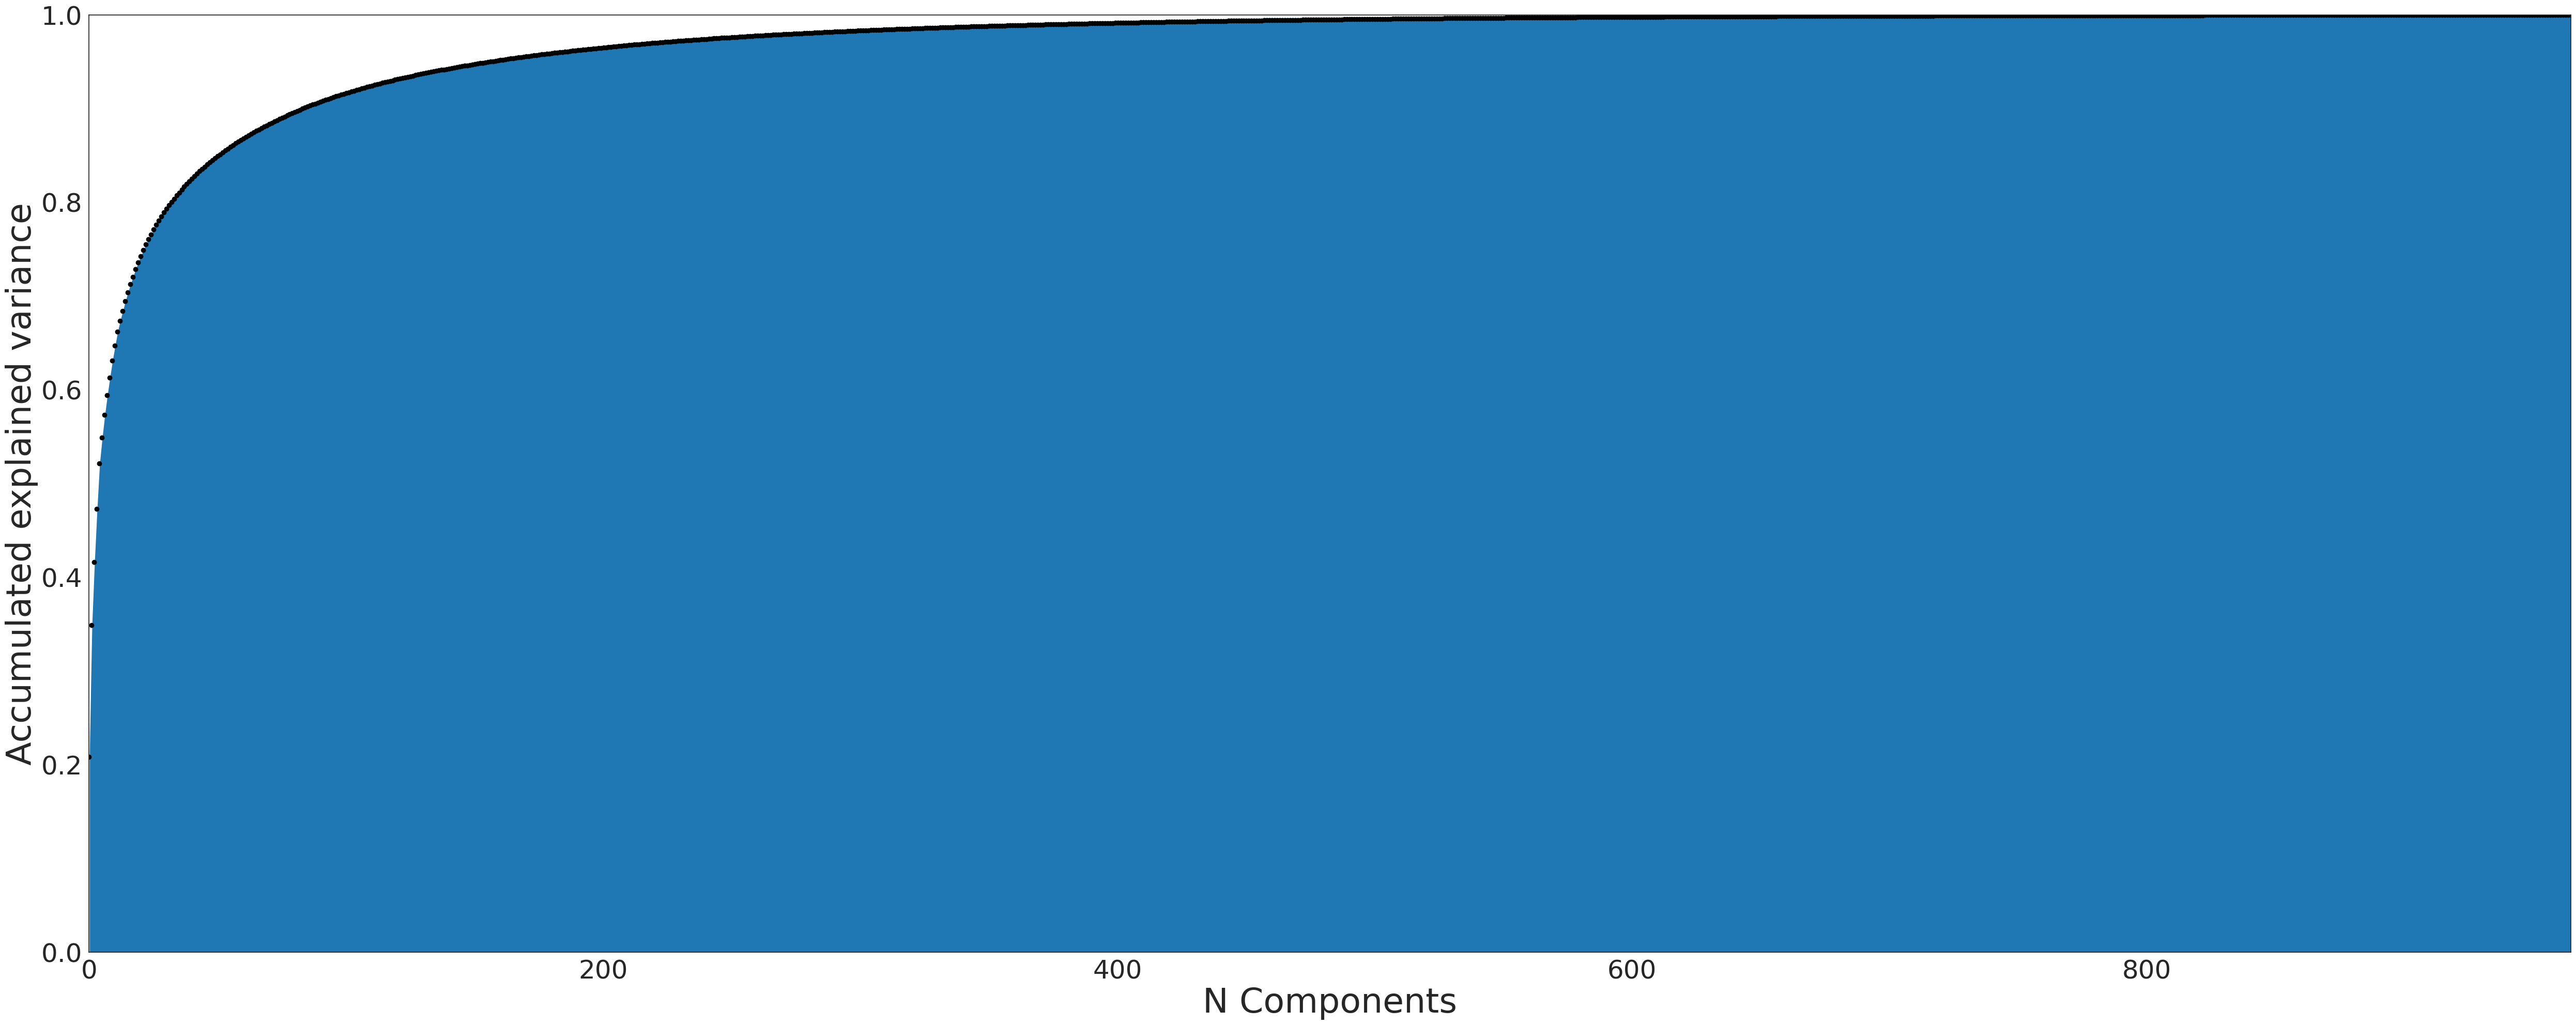

In [93]:
plot_explained_variance(pca)
plt.show()

In [94]:
threshold = 0.60


In [95]:
components = np.cumsum(pca.explained_variance_ratio_) < threshold
components.sum()

8

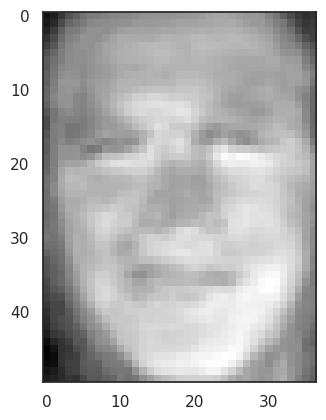

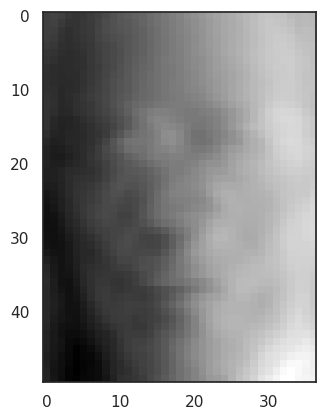

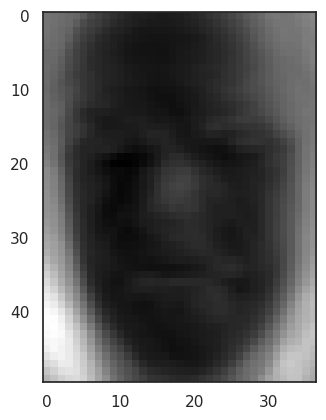

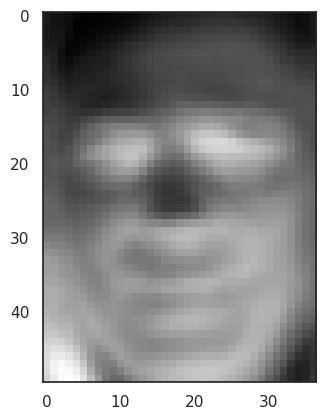

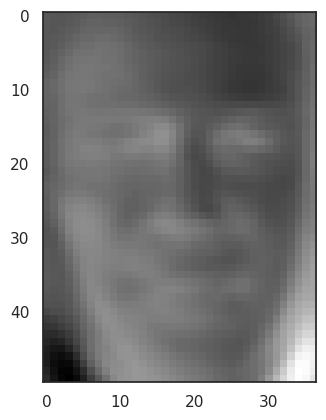

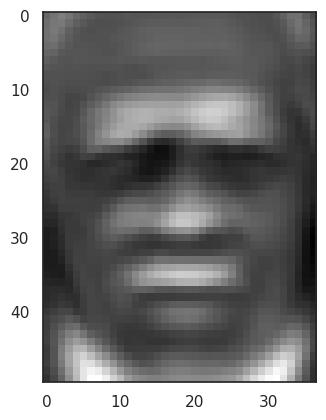

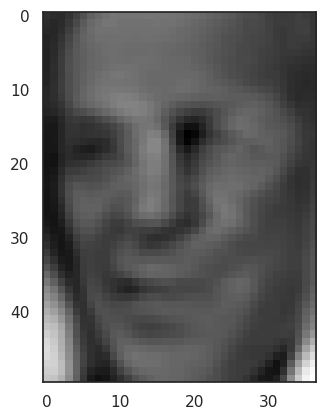

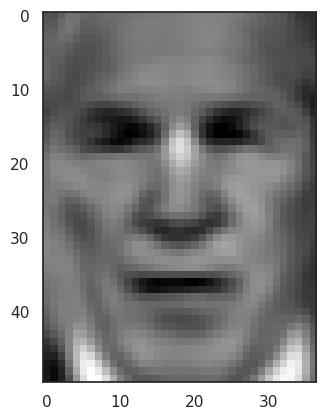

In [96]:
for component in pca.components_[components,:]:
    plt.imshow(component.reshape(h, w),cmap='gray')
    plt.show()

In [97]:
pca = PCA(n_components=150, svd_solver="randomized", whiten=True).fit(X_train)


In [98]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [99]:
person_index = 1


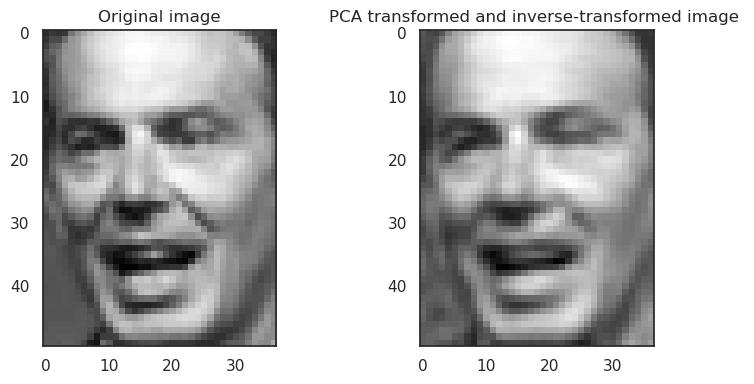

In [100]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(lfw_people.images[person_index,:,:],cmap='gray')
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(pca.inverse_transform(pca.transform(X[person_index ,:].reshape(1, -1))).reshape(h, w),cmap='gray')
plt.title("PCA transformed and inverse-transformed image ") 

plt.tight_layout()
plt.show()

In [101]:

param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)

clf = clf.fit(X_train_pca, y_train)

In [102]:
y_pred = clf.predict(X_test_pca)


In [103]:
hmap = sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    xticklabels=lfw_people.target_names,
    yticklabels=lfw_people.target_names,
    fmt='g'
)
hmap.set_xlabel('Predicted Value')
hmap.set_ylabel('Truth Value')
plt.show()

Text(46.24999999999999, 0.5, 'Truth Value')